**STEP 1: PREPARING STOCK NEWS SENTIMENT DATA FOR MERGING WITH NIFTY-50 DATA.**

THE NEWS SENTIMENT DATA WAS AVAILABLE FROM JAN.2017 TO APRIL 2021.

In [1]:
import pandas as pd

In [2]:
# SENTIMENT DATASET
sentiment_data = pd.read_csv(r"C:\Users\usre\.cache\kagglehub\datasets\harshrkh\india-financial-news-headlines-sentiments\versions\1\News_sentiment_Jan2017_to_Apr2021.csv")

sentiment_data.head() # AS THE DATASET SENTIMENT IN POSITIVE AND NEGATIVE FORMAT, SO FIRST STEP IS GET INTO NUMERICAL FORM

Date                                              Title  \
0  05/01/17  Eliminating shadow economy to have positive im...   
1  05/01/17  Two Chinese companies hit roadblock with India...   
2  05/01/17                SoftBank India Vision gets new $100   
3  05/01/17  Nissan halts joint development of luxury cars ...   
4  05/01/17  Despite challenges Rajasthan continues to prog...   

                                                 URL sentiment  confidence  \
0  http://economictimes.indiatimes.com/news/econo...  POSITIVE    0.996185   
1  http://economictimes.indiatimes.com/news/econo...  NEGATIVE   -0.955493   
2  http://economictimes.indiatimes.com/small-biz/...  POSITIVE    0.595612   
3  http://economictimes.indiatimes.com/news/inter...  NEGATIVE   -0.996672   
4  http://economictimes.indiatimes.com/news/polit...  POSITIVE    0.997388   

   Unnamed: 5  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [3]:
# Replace sentiment text with numeric values
sentiment_data['sentiment'] = sentiment_data['sentiment'].replace({'POSITIVE': 1, 'NEGATIVE': -1})

# Verify the changes
print(sentiment_data[['Date', 'sentiment']].head())


       Date  sentiment
0  05/01/17          1
1  05/01/17         -1
2  05/01/17          1
3  05/01/17         -1
4  05/01/17          1


C:\Users\usre\AppData\Local\Temp\ipykernel_20164\168848530.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sentiment_data['sentiment'] = sentiment_data['sentiment'].replace({'POSITIVE': 1, 'NEGATIVE': -1})


THE DATASET HAS VARIOUS NEWS ARTICLES FOR THE SAME DATE, SO IT NEEDS TO BE AGGREGATED.

In [4]:
# Convert Date column to datetime format
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Group by date and compute aggregated values
aggregated_data = sentiment_data.groupby('Date').apply(
    lambda x: pd.Series({
        'avg_sentiment': x['sentiment'].mean(),  # Average sentiment
        'weighted_avg_sentiment': (x['sentiment'] * x['confidence']).sum() / x['confidence'].sum(),  # Weighted avg
        'avg_confidence': x['confidence'].mean()  # Average confidence
    })
).reset_index()

# Verify the result
print(aggregated_data.head())


C:\Users\usre\AppData\Local\Temp\ipykernel_20164\674418719.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])


        Date  avg_sentiment  weighted_avg_sentiment  avg_confidence
0 2017-01-01      -0.166667               -6.268904       -0.149747
1 2017-01-02       0.067227               12.662886        0.071982
2 2017-01-03      -0.091787               -8.593564       -0.104565
3 2017-01-04      -0.142857               -6.316718       -0.143387
4 2017-01-05      -0.034483             -705.804622       -0.001274


C:\Users\usre\AppData\Local\Temp\ipykernel_20164\674418719.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggregated_data = sentiment_data.groupby('Date').apply(


In [5]:
# Fill missing confidence values with a default (e.g., 0)
sentiment_data['confidence'] = sentiment_data['confidence'].fillna(0)


In [6]:
# Check unique dates and rows after aggregation
print(f"Number of unique dates: {aggregated_data['Date'].nunique()}")
print(f"Number of rows in aggregated data: {len(aggregated_data)}")

# THE ORIGINCAL DATASET HAD OVER 200K ROWS NOW IT COMPRESSES INTO 1554 ROWS WHICH IS EQUAL TO NUMBER OF DAYS FROM JAN.2017 TO APRIL 2021

Number of unique dates: 1554
Number of rows in aggregated data: 1554


In [7]:
# Save to a CSV file
aggregated_data.to_csv('cleaned_sentiment_data.csv', index=False)

print("Cleaned data saved to 'cleaned_sentiment_data.csv'")


Cleaned data saved to 'cleaned_sentiment_data.csv'


In [8]:
import os

In [9]:
aggregated_data.to_csv('cleaned_sentiment_data.csv', index=False)
print("File saved in:", os.getcwd())



File saved in: c:\Users\usre


**NOW OUR NEWS SENTIMENT DATASET IS READY FOR MERGING WITH THE NIFTY-50 DATA. NIFTY-50 IS CHOOSE BECAUSE HISTORICAL SENTIMENT DATA FOR SPECIFIC STOCKS WAS NOT AVAILABLE FOR FREE.**

**STEP 2: MERGING NIFTY-50 AND SENTIMENT DATA**

In [10]:
import yfinance as yf

In [11]:
# Download Nifty 50 historical data from Yahoo Finance
nifty_data = yf.download("^NSEI", start="2017-01-01", end="2021-04-30")

# Preview the data
print(nifty_data.head())


[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-02  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000   
2017-01-03  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000   
2017-01-04  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000   
2017-01-05  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805   
2017-01-06  8281.849609  8306.849609  8233.250000  8243.799805  8243.799805   

            Volume  
Date                
2017-01-02  118300  
2017-01-03  127300  
2017-01-04  132400  
2017-01-05  159100  
2017-01-06  139400  


In [12]:
# Reset the index to make 'Date' a column
nifty_data.reset_index(inplace=True)

# Preview the data to see 'Date' as a column
print(nifty_data.head())


        Date         Open         High          Low        Close    Adj Close  \
0 2017-01-02  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000   
1 2017-01-03  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000   
2 2017-01-04  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000   
3 2017-01-05  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805   
4 2017-01-06  8281.849609  8306.849609  8233.250000  8243.799805  8243.799805   

   Volume  
0  118300  
1  127300  
2  132400  
3  159100  
4  139400  


In [13]:
# Get the number of rows in the nifty_data DataFrame
num_rows_nifty = len(nifty_data)

# Alternatively, using shape attribute (rows, columns)
num_rows_nifty_shape = nifty_data.shape[0]

# Print the number of rows
print(f"Number of rows in Nifty data: {num_rows_nifty}")
print(f"Number of rows (using shape): {num_rows_nifty_shape}")

# AS THE NFTY-50 DATA HAS 1063 ROWS SO IT NEED TO BE FIX SO THAT WE GET SENTIMENT AND STOCK DATA FOR THE SAME DATES.

Number of rows in Nifty data: 1063
Number of rows (using shape): 1063


** DUE TO DIFFERENCE IN SENTIMENT DATA DATE RANGE AND NIFTY-50 DATA, IT IS PREPROCESS TO THE WE HAVE SAME DATES FOR BOTH DATASETS

In [14]:
# Create a complete date range (trading + non-trading days)
full_date_range = pd.DataFrame({
    'Date': pd.date_range(start=nifty_data['Date'].min(), end=nifty_data['Date'].max())
})

# Merge aggregated sentiment data with full date range
full_sentiment_data = full_date_range.merge(aggregated_data, on='Date', how='left')

# Forward-fill non-trading day sentiment to the next trading day
full_sentiment_data['avg_sentiment'] = full_sentiment_data['avg_sentiment'].fillna(method='ffill')
full_sentiment_data['weighted_avg_sentiment'] = full_sentiment_data['weighted_avg_sentiment'].fillna(method='ffill')
full_sentiment_data['avg_confidence'] = full_sentiment_data['avg_confidence'].fillna(method='ffill')

# Filter only trading days to align with nifty_data
aligned_sentiment_data = full_sentiment_data[full_sentiment_data['Date'].isin(nifty_data['Date'])]

# Merge aligned sentiment data with nifty_data
final_data = aligned_sentiment_data.merge(nifty_data, on='Date', how='inner')

# Check final dataset
print(final_data.head())

        Date  avg_sentiment  weighted_avg_sentiment  avg_confidence  \
0 2017-01-02       0.067227               12.662886        0.071982   
1 2017-01-03      -0.091787               -8.593564       -0.104565   
2 2017-01-04      -0.142857               -6.316718       -0.143387   
3 2017-01-05      -0.034483             -705.804622       -0.001274   
4 2017-01-06      -0.342723               -2.746857       -0.329037   

          Open         High          Low        Close    Adj Close  Volume  
0  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000  118300  
1  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000  127300  
2  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000  132400  
3  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805  159100  
4  8281.849609  8306.849609  8233.250000  8243.799805  8243.799805  139400  


C:\Users\usre\AppData\Local\Temp\ipykernel_20164\4207554312.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_sentiment_data['avg_sentiment'] = full_sentiment_data['avg_sentiment'].fillna(method='ffill')
C:\Users\usre\AppData\Local\Temp\ipykernel_20164\4207554312.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_sentiment_data['weighted_avg_sentiment'] = full_sentiment_data['weighted_avg_sentiment'].fillna(method='ffill')
C:\Users\usre\AppData\Local\Temp\ipykernel_20164\4207554312.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  full_sentiment_data['avg_confidence'] = full_sentiment_data['avg_confidence'].fillna(method='ffill')


In [15]:
# Get the number of rows in the nifty_data DataFrame
print(len(final_data))

# Alternatively, using shape attribute (rows, columns)
print(final_data.shape[0])


1063
1063


**Define the Target Variable (Price Movement)**

* Calculate Price Movement:

Compare the closing price of the current day with the closing price of the previous day.

* Label the Movement:

If the closing price increases compared to the previous day, label it 1 (up).
If it decreases, label it 0 (down).

In [16]:
# Create a column for price movement
final_data['Price_Movement'] = (final_data['Close'] > final_data['Close'].shift(1)).astype(int)

# Drop the first row since it will have a NaN value after the shift
final_data = final_data.dropna()

# Check the updated dataset
print(final_data[['Date', 'Close', 'Price_Movement']].head())


        Date        Close  Price_Movement
0 2017-01-02  8179.500000               0
1 2017-01-03  8192.250000               1
2 2017-01-04  8190.500000               0
3 2017-01-05  8273.799805               1
4 2017-01-06  8243.799805               0


In [17]:
print(final_data.head())

        Date  avg_sentiment  weighted_avg_sentiment  avg_confidence  \
0 2017-01-02       0.067227               12.662886        0.071982   
1 2017-01-03      -0.091787               -8.593564       -0.104565   
2 2017-01-04      -0.142857               -6.316718       -0.143387   
3 2017-01-05      -0.034483             -705.804622       -0.001274   
4 2017-01-06      -0.342723               -2.746857       -0.329037   

          Open         High          Low        Close    Adj Close  Volume  \
0  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000  118300   
1  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000  127300   
2  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000  132400   
3  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805  159100   
4  8281.849609  8306.849609  8233.250000  8243.799805  8243.799805  139400   

   Price_Movement  
0               0  
1               1  
2               0  
3               1  
4   

NOW OUT DATASET IS READY FOR THE NEXT STEPS IN MODEL BUILDING

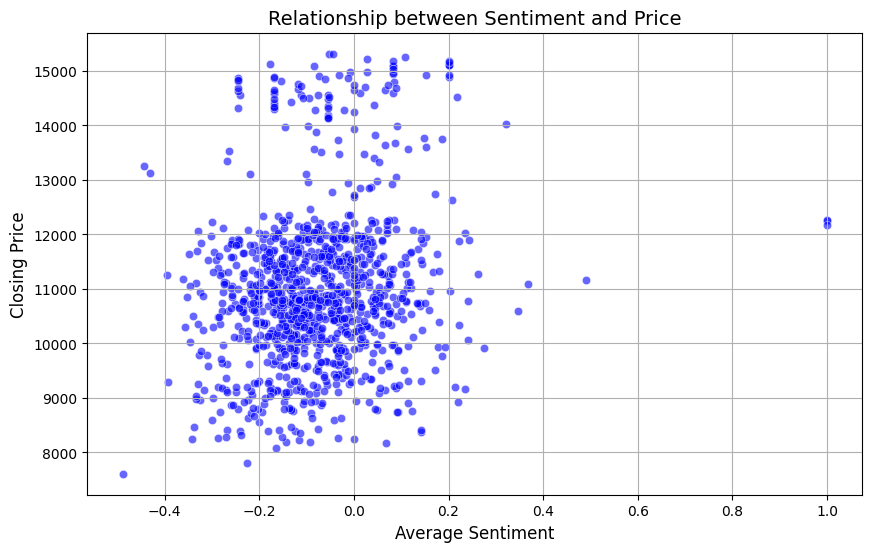

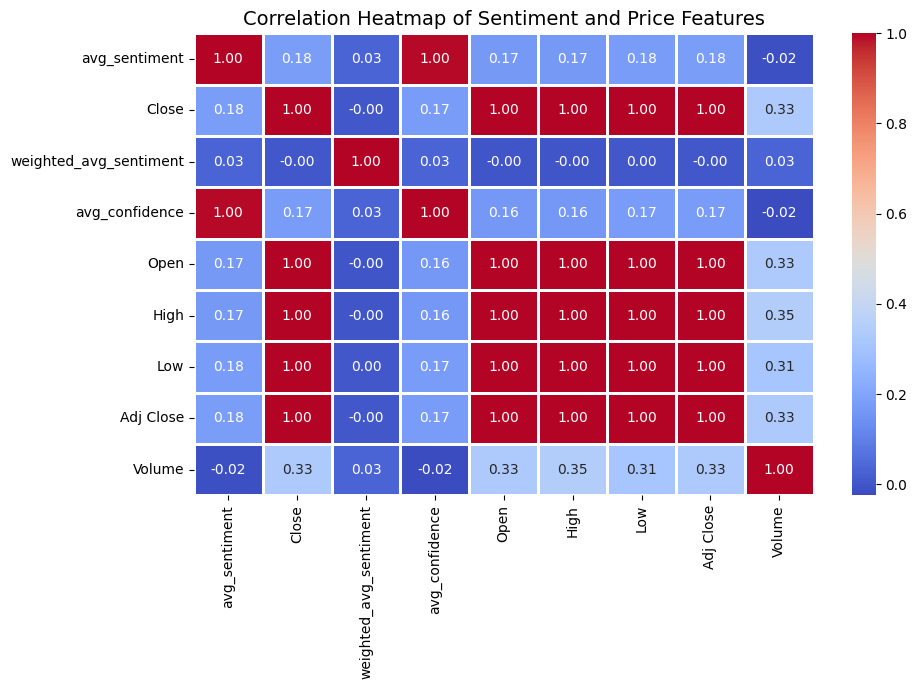

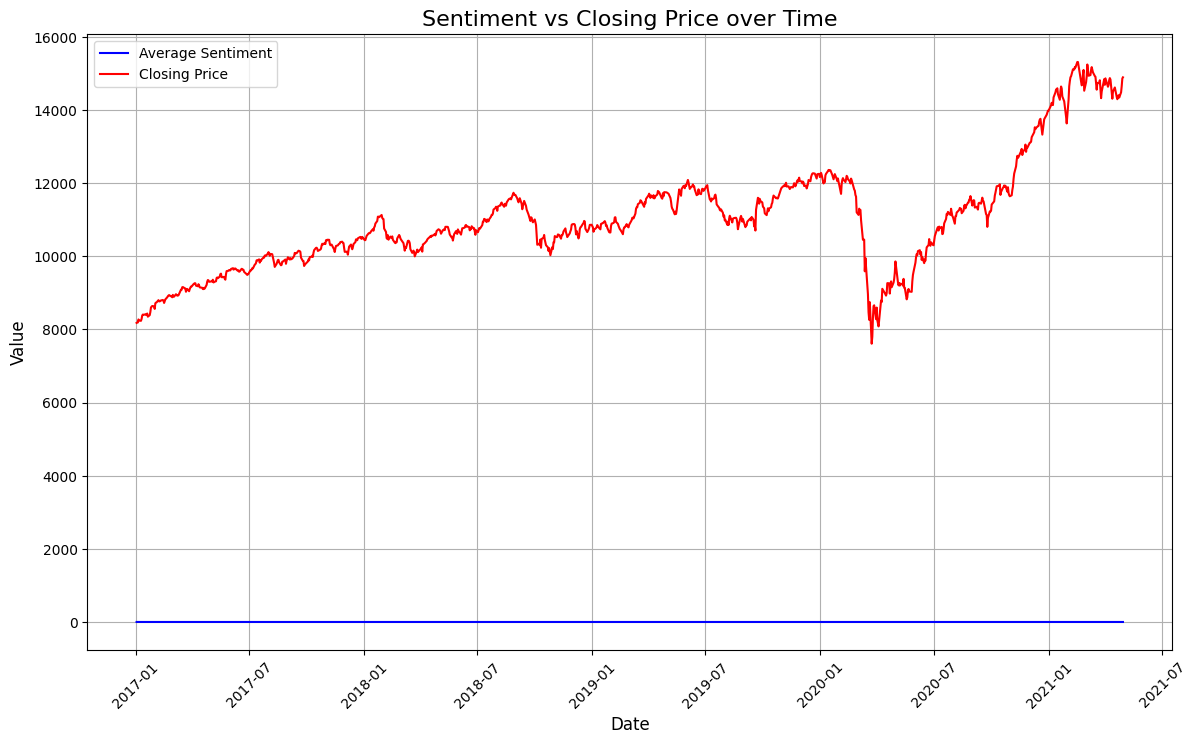

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between sentiment (avg_sentiment) and price (Close)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_sentiment', y='Close', data=final_data, color='blue', alpha=0.6)
plt.title('Relationship between Sentiment and Price', fontsize=14)
plt.xlabel('Average Sentiment', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(True)
plt.show()

# Correlation heatmap to show the relationship between all numeric features (including sentiment and price)
plt.figure(figsize=(10, 6))
correlation_matrix = final_data[['avg_sentiment', 'Close', 'weighted_avg_sentiment', 'avg_confidence', 'Open', 'High', 'Low', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Sentiment and Price Features', fontsize=14)
plt.show()

# Line plot to visualize the trend of sentiment and price over time
plt.figure(figsize=(14, 8))
plt.plot(final_data['Date'], final_data['avg_sentiment'], label='Average Sentiment', color='blue')
plt.plot(final_data['Date'], final_data['Close'], label='Closing Price', color='red')
plt.title('Sentiment vs Closing Price over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


                        avg_sentiment  weighted_avg_sentiment  avg_confidence  \
avg_sentiment                1.000000                0.033415        0.995717   
weighted_avg_sentiment       0.033415                1.000000        0.033326   
avg_confidence               0.995717                0.033326        1.000000   
Close                        0.175765               -0.000206        0.172329   

                           Close  
avg_sentiment           0.175765  
weighted_avg_sentiment -0.000206  
avg_confidence          0.172329  
Close                   1.000000  


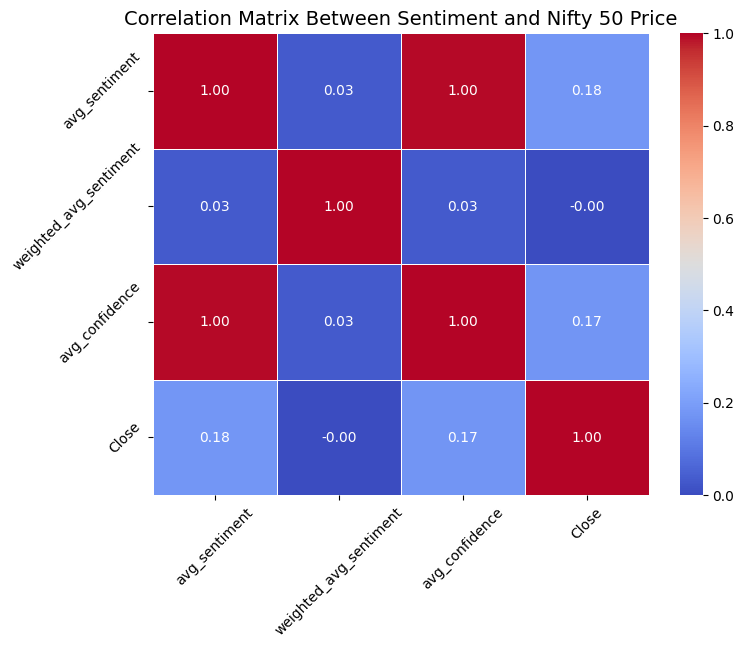

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns: sentiment and price-related columns
correlation_data = final_data[['avg_sentiment', 'weighted_avg_sentiment', 'avg_confidence', 'Close']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Matrix Between Sentiment and Nifty 50 Price', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()


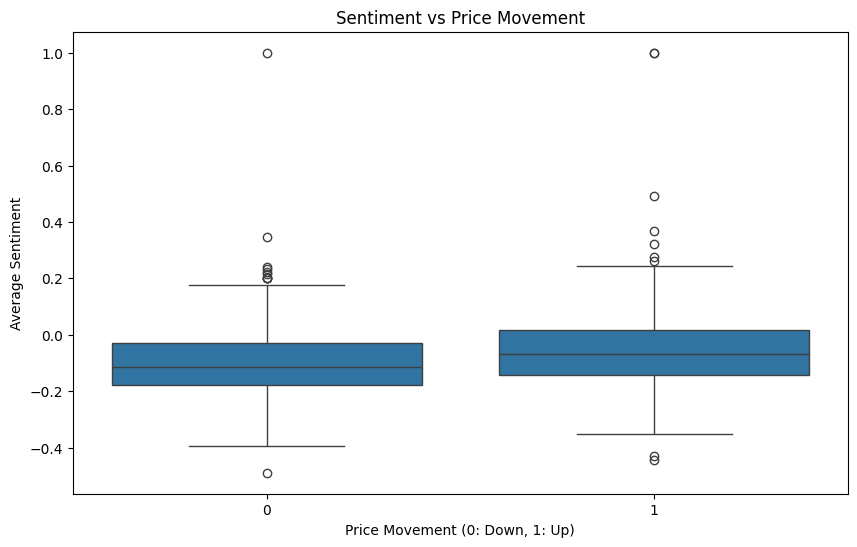

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to check sentiment distribution for Price_Movement (0: Down, 1: Up)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Movement', y='avg_sentiment', data=final_data)
plt.title("Sentiment vs Price Movement")
plt.xlabel('Price Movement (0: Down, 1: Up)')
plt.ylabel('Average Sentiment')
plt.show()


In [21]:
# Calculate the Pearson correlation between avg_sentiment and Price_Movement
correlation = final_data['avg_sentiment'].corr(final_data['Price_Movement'])

print(f"Correlation between avg_sentiment and Price Movement: {correlation}")


Correlation between avg_sentiment and Price Movement: 0.15830162110566903


**Step 3: Select Features and Prepare the Dataset for Modeling**

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['avg_sentiment', 'weighted_avg_sentiment', 'avg_confidence', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
X[features] = scaler.fit_transform(X[features])


NameError: name 'X' is not defined

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
features = ['avg_sentiment', 'weighted_avg_sentiment', 'avg_confidence', 'Volume']
X = final_data[features]
y = final_data['Price_Movement']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (850, 4)
X_test shape: (213, 4)
y_train shape: (850,)
y_test shape: (213,)


**CHOOSING THE TRAINING MODEL**

MODEL 1: LOGISTIC REGRESSION MODEL

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6009389671361502

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.32      0.41        95
           1       0.60      0.83      0.70       118

    accuracy                           0.60       213
   macro avg       0.60      0.57      0.56       213
weighted avg       0.60      0.60      0.57       213


Confusion Matrix:
 [[30 65]
 [20 98]]


The model shows a 60% accuracy, but the recall for class 0 (down) is low, suggesting that the model is better at predicting price increases (class 1) compared to decreases (class 0). This can lead to an imbalanced prediction problem, where the model favors the positive (price up) class.

In [99]:
#Try Class Weights with Logistic Regression


# Initialize Logistic Regression with class weights to handle class imbalance
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6056338028169014

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.59      0.57        95
           1       0.65      0.62      0.63       118

    accuracy                           0.61       213
   macro avg       0.60      0.60      0.60       213
weighted avg       0.61      0.61      0.61       213


Confusion Matrix:
 [[56 39]
 [45 73]]


The updated model with class weights shows a slight improvement in accuracy (60.6%), but there is still room for improvement, particularly in the recall for class 1 (price up).

**MODEL 2: RANDOM FOREST CLASSIFIER**

In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.5070422535211268

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.46      0.46        95
           1       0.56      0.54      0.55       118

    accuracy                           0.51       213
   macro avg       0.50      0.50      0.50       213
weighted avg       0.51      0.51      0.51       213


Confusion Matrix:
 [[44 51]
 [54 64]]


The Random Forest model shows accuracy of 51%, which is lower than the Logistic Regression with class weights (60.6%). The recall for class 0 (price down) and class 1 (price up) are still relatively low, indicating that both models are struggling to predict both classes well, possibly due to feature selection, class imbalance, or model limitations.

**MODEL 3: XG BOOST**

In [101]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=2)  # Adjust scale_pos_weight for imbalance

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.568075117370892

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.38      0.44        95
           1       0.59      0.72      0.65       118

    accuracy                           0.57       213
   macro avg       0.56      0.55      0.54       213
weighted avg       0.56      0.57      0.56       213


Confusion Matrix:
 [[36 59]
 [33 85]]


The XGBoost model has improved accuracy to 56.8%, which is still an improvement over the previous models. The recall for class 1 (price up) has increased, but the recall for class 0 (price down) is still relatively low. This suggests that while the model is doing better at predicting price increases, it is still struggling with predicting price decreases.

* Precision: The precision for class 1 is higher than for class 0, indicating the model is more confident about predicting price increases.

* Recall: The recall for class 1 is better, but the recall for class 0 is low. This suggests that the model may be biased towards predicting price increases.

In [102]:
# Try Hyperparameter Tuning (XGBoost)
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'scale_pos_weight': [1, 2, 3]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and evaluate
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Accuracy:", accuracy_best)
print("\nBest Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nBest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Accuracy: 0.5539906103286385

Best Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        95
           1       0.57      0.75      0.65       118

    accuracy                           0.55       213
   macro avg       0.54      0.53      0.52       213
weighted avg       0.54      0.55      0.53       213


Best Confusion Matrix:
 [[29 66]
 [29 89]]


**MODEL 4: SMOTE for Balancing Classes**

In [103]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Resampled class distribution:", Counter(y_train_resampled))

# Train XGBoost on resampled data
xgb_model_resampled = XGBClassifier(random_state=42)
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on test data
y_pred_resampled = xgb_model_resampled.predict(X_test)

# Accuracy and classification report
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print("Accuracy after SMOTE:", accuracy_resampled)
print("\nClassification Report:\n", classification_report(y_test, y_pred_resampled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_resampled))


Resampled class distribution: Counter({1: 470, 0: 470})
Accuracy after SMOTE: 0.5868544600938967

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.53      0.53        95
           1       0.62      0.64      0.63       118

    accuracy                           0.59       213
   macro avg       0.58      0.58      0.58       213
weighted avg       0.59      0.59      0.59       213


Confusion Matrix:
 [[50 45]
 [43 75]]


* With the use of SMOTE, the model has achieved a slight improvement in     accuracy (58.7%) compared to previous models. The class distribution has been balanced, with 470 instances of both classes (0 and 1) in the training data.

**Key Observations:**
- Accuracy increased to 58.7%, which is a step forward but still below optimal for stock price prediction.
- Precision for class 1 (price up) improved to 0.62, and recall increased to 0.64, which shows a more balanced prediction for price increases.
- Precision for class 0 (price down) is 0.54, and recall is 0.53, indicating an improvement in predicting price decreases, though still moderate.

- Confusion Matrix:

True positives (TP) for class 1 (price up): 75

True negatives (TN) for class 0 (price down): 50

False positives (FP) for class 1 (price up): 

False negatives (FN) for class 0 (price down): 43

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report


# Select features and target
features = ['avg_sentiment', 'weighted_avg_sentiment', 'avg_confidence', 'Volume']
X = final_data[features].values
y = final_data['Price_Movement'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape X for LSTM (required 3D input)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# MLP Model (Feedforward Neural Network)
def create_mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (0 or 1)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train MLP model
mlp_model = create_mlp_model(X_train.shape[1])
mlp_model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate MLP model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f"MLP Model Accuracy: {mlp_accuracy * 100:.2f}%")

# Predict using MLP
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred_mlp))

# Create and train LSTM model
lstm_model = create_lstm_model(X_train_lstm.shape[1:])
lstm_model.summary()

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

# Predict using LSTM
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred_lstm))


c:\Users\usre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5634 - loss: 0.6880 - val_accuracy: 0.6176 - val_loss: 0.6732
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5738 - loss: 0.6770 - val_accuracy: 0.6235 - val_loss: 0.6735
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5433 - loss: 0.6822 - val_accuracy: 0.6176 - val_loss: 0.6737
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5863 - loss: 0.6639 - val_accuracy: 0.6059 - val_loss: 0.6756
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6055 - loss: 0.6596 - val_accuracy: 0.6176 - val_loss: 0.6748
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5988 - loss: 0.6594 - val_accuracy: 0.6176 - val_loss: 0.6765
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6149 - loss: 0.6594 - val_accuracy: 0.6000 - val_loss: 0.6791
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 0.6683 - val_accuracy: 0.6294 - v

c:\Users\usre\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4863 - loss: 0.6980 - val_accuracy: 0.4824 - val_loss: 0.6971
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5286 - loss: 0.6934 - val_accuracy: 0.6000 - val_loss: 0.6908
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5928 - loss: 0.6888 - val_accuracy: 0.5941 - val_loss: 0.6868
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5560 - loss: 0.6866 - val_accuracy: 0.6000 - val_loss: 0.6832
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5930 - loss: 0.6763 - val_accuracy: 0.6235 - val_loss: 0.6812
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 0.6737 - val_accuracy: 0.6294 - val_loss: 0.6815
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5911 - loss: 0.6729 - val_accuracy: 0.6294 - val_loss: 0.6814
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6092 - loss: 0.6666 - val_accuracy: 0.6235 - 

In [106]:
# Check for missing values in the dataset
print(final_data.isnull().sum())

# Fill missing values with the mean for numerical columns
final_data.fillna(final_data.mean(), inplace=True)

# Alternatively, if you want to drop rows with missing values
# final_data.dropna(inplace=True)

# Verify that the missing values are handled
print(final_data.isnull().sum())


Date                      0
avg_sentiment             0
weighted_avg_sentiment    0
avg_confidence            0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Price_Movement            0
dtype: int64
Date                      0
avg_sentiment             0
weighted_avg_sentiment    0
avg_confidence            0
Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Price_Movement            0
dtype: int64


In [124]:
# Adding 7-day and 14-day moving averages to final_data
final_data['7_day_MA'] = final_data['Close'].rolling(window=7).mean()
final_data['14_day_MA'] = final_data['Close'].rolling(window=14).mean()

# Check the new columns
print(final_data[['Close', '7_day_MA', '14_day_MA']].tail())


             Close      7_day_MA     14_day_MA
1058  14341.349609  14443.921456  14581.042759
1059  14485.000000  14441.092913  14553.732073
1060  14653.049805  14451.321429  14554.821359
1061  14864.549805  14486.564314  14567.753488
1062  14894.900391  14563.057199  14573.171387


In [125]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features = ['avg_sentiment', 'weighted_avg_sentiment', 'avg_confidence', 'Volume', '7_day_MA', '14_day_MA']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the selected features
final_data[features] = scaler.fit_transform(final_data[features])

# Check the scaled data
print(final_data[features].head())


   avg_sentiment  weighted_avg_sentiment  avg_confidence    Volume  7_day_MA  \
0       1.047798                0.019592        1.147052 -1.195444       NaN   
1      -0.103510               -0.046440       -0.196214 -1.158771       NaN   
2      -0.473269               -0.039367       -0.491587 -1.137989       NaN   
3       0.311391               -2.212298        0.589682 -1.029192       NaN   
4      -1.920354               -0.028277       -1.904110 -1.109466       NaN   

   14_day_MA  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [126]:
# Check for NaN values in the '7_day_MA' and '14_day_MA' columns
print(final_data[['7_day_MA', '14_day_MA']].isna().sum())
print(final_data[final_data['7_day_MA'].isna()])
print(final_data[final_data['14_day_MA'].isna()])


7_day_MA      6
14_day_MA    13
dtype: int64
        Date  avg_sentiment  weighted_avg_sentiment  avg_confidence  \
0 2017-01-02       1.047798                0.019592        1.147052   
1 2017-01-03      -0.103510               -0.046440       -0.196214   
2 2017-01-04      -0.473269               -0.039367       -0.491587   
3 2017-01-05       0.311391               -2.212298        0.589682   
4 2017-01-06      -1.920354               -0.028277       -1.904110   
5 2017-01-09      -0.274361               -0.044237       -0.299813   

          Open         High          Low        Close    Adj Close    Volume  \
0  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000 -1.195444   
1  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000 -1.158771   
2  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000 -1.137989   
3  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805 -1.029192   
4  8281.849609  8306.849609  8233.250000  8243.799805  82

In [127]:
# Check the first few rows of the moving averages before filling
print(final_data[['7_day_MA', '14_day_MA']].head())


   7_day_MA  14_day_MA
0       NaN        NaN
1       NaN        NaN
2       NaN        NaN
3       NaN        NaN
4       NaN        NaN


In [128]:
# Calculate the 7-day and 14-day moving averages for the 'Close' price
final_data['7_day_MA'] = final_data['Close'].rolling(window=7).mean()
final_data['14_day_MA'] = final_data['Close'].rolling(window=14).mean()

# Check the first few rows to verify the calculation
print(final_data[['Close', '7_day_MA', '14_day_MA']].head(15))


          Close     7_day_MA    14_day_MA
0   8179.500000          NaN          NaN
1   8192.250000          NaN          NaN
2   8190.500000          NaN          NaN
3   8273.799805          NaN          NaN
4   8243.799805          NaN          NaN
5   8236.049805          NaN          NaN
6   8288.599609  8229.214146          NaN
7   8380.650391  8257.949916          NaN
8   8407.200195  8288.657087          NaN
9   8400.349609  8318.635603          NaN
10  8412.799805  8338.492746          NaN
11  8398.000000  8360.521345          NaN
12  8417.000000  8386.371373          NaN
13  8435.099609  8407.299944  8318.257045
14  8349.349609  8402.828404  8330.389160


In [140]:
# Calculate 7-day moving average and 14-day moving average
final_data['7_day_MA'] = final_data['Close'].rolling(window=7).mean()
final_data['14_day_MA'] = final_data['Close'].rolling(window=14).mean()


In [141]:
final_data['7_day_MA'] = final_data['7_day_MA'].ffill()
final_data['14_day_MA'] = final_data['14_day_MA'].ffill()


In [143]:
# Check correlation between features and target variable
correlations = final_data.corr()
print(correlations['Price_Movement'])


Date                      0.025133
avg_sentiment             0.158302
weighted_avg_sentiment    0.031713
avg_confidence            0.164006
Open                      0.004926
High                      0.020688
Low                       0.028181
Close                     0.045114
Adj Close                 0.045114
Volume                   -0.000398
Price_Movement            1.000000
7_day_MA                 -0.012395
14_day_MA                -0.011964
Name: Price_Movement, dtype: float64


In [144]:
# Dropping less useful features
final_data_cleaned = final_data.drop(columns=['Volume', '7_day_MA', '14_day_MA'])

# Check the updated DataFrame
final_data_cleaned.head()


Date  avg_sentiment  weighted_avg_sentiment  avg_confidence  \
0 2017-01-02       1.047798                0.019592        1.147052   
1 2017-01-03      -0.103510               -0.046440       -0.196214   
2 2017-01-04      -0.473269               -0.039367       -0.491587   
3 2017-01-05       0.311391               -2.212298        0.589682   
4 2017-01-06      -1.920354               -0.028277       -1.904110   

          Open         High          Low        Close    Adj Close  \
0  8210.099609  8212.000000  8133.799805  8179.500000  8179.500000   
1  8196.049805  8219.099609  8148.600098  8192.250000  8192.250000   
2  8202.650391  8218.500000  8180.899902  8190.500000  8190.500000   
3  8226.650391  8282.650391  8223.700195  8273.799805  8273.799805   
4  8281.849609  8306.849609  8233.250000  8243.799805  8243.799805   

   Price_Movement  
0               0  
1               1  
2               0  
3               1  
4               0

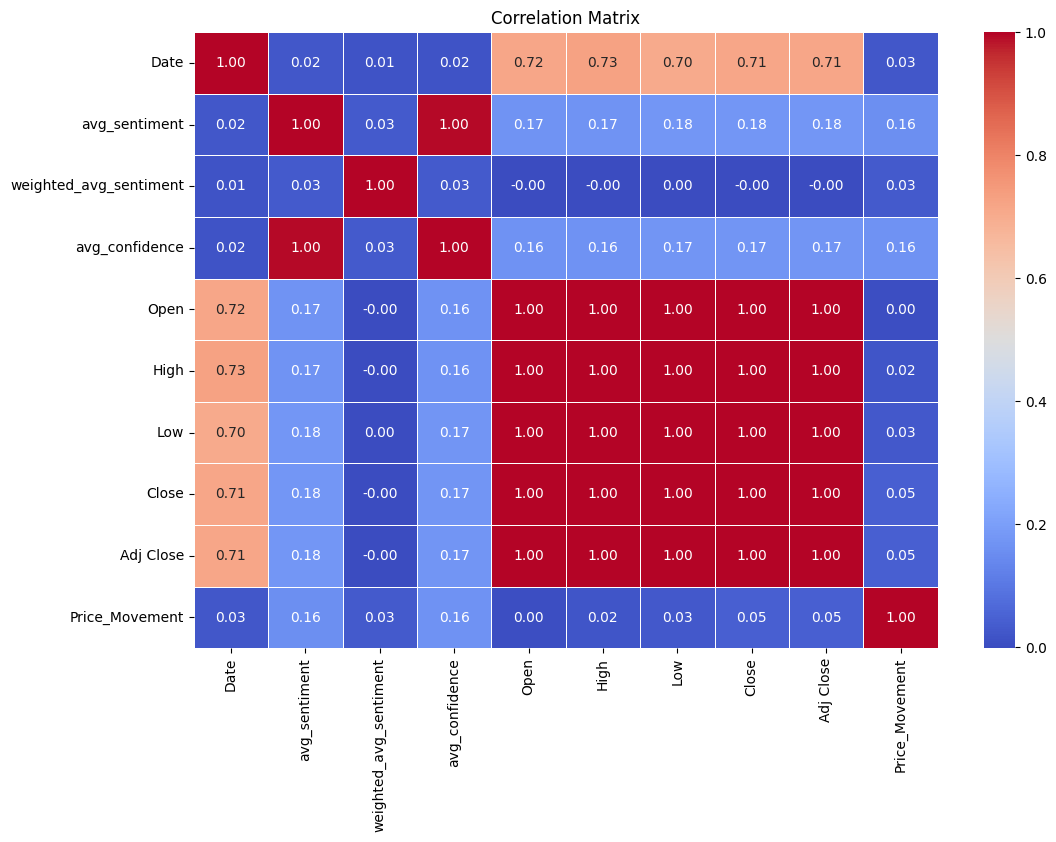

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = final_data_cleaned.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [147]:
print(correlation_matrix)

                            Date  avg_sentiment  weighted_avg_sentiment  \
Date                    1.000000       0.023282                0.013919   
avg_sentiment           0.023282       1.000000                0.033415   
weighted_avg_sentiment  0.013919       0.033415                1.000000   
avg_confidence          0.015515       0.995717                0.033326   
Open                    0.715474       0.166858               -0.001737   
High                    0.726707       0.167051               -0.001211   
Low                     0.702994       0.175249                0.000321   
Close                   0.714870       0.175765               -0.000206   
Adj Close               0.714870       0.175765               -0.000206   
Price_Movement          0.025133       0.158302                0.031713   

                        avg_confidence      Open      High       Low  \
Date                          0.015515  0.715474  0.726707  0.702994   
avg_sentiment                 

In [151]:
# Print the column names to verify
print(final_data_cleaned.columns)


Index(['Date', 'avg_sentiment', 'weighted_avg_sentiment', 'avg_confidence',
       'Close', 'Price_Movement'],
      dtype='object')


In [152]:
# Drop the 'weighted_avg_sentiment' column
final_data_cleaned = final_data_cleaned.drop(columns=['weighted_avg_sentiment'], errors='ignore')

# Retain the important columns
final_data_cleaned = final_data_cleaned[['Date', 'avg_sentiment', 'avg_confidence', 'Close', 'Price_Movement']]

# Check the resulting dataframe
print(final_data_cleaned.head())


        Date  avg_sentiment  avg_confidence        Close  Price_Movement
0 2017-01-02       1.047798        1.147052  8179.500000               0
1 2017-01-03      -0.103510       -0.196214  8192.250000               1
2 2017-01-04      -0.473269       -0.491587  8190.500000               0
3 2017-01-05       0.311391        0.589682  8273.799805               1
4 2017-01-06      -1.920354       -1.904110  8243.799805               0


In [153]:
# Create lagged features for 'Close'
final_data_cleaned['Close_Lag1'] = final_data_cleaned['Close'].shift(1)
final_data_cleaned['Close_Lag2'] = final_data_cleaned['Close'].shift(2)

In [154]:
# Drop rows with NaN values caused by shifting
final_data_cleaned = final_data_cleaned.dropna()

# Now define the features and target
X = final_data_cleaned[['avg_sentiment', 'avg_confidence', 'Close', 'Close_Lag1', 'Close_Lag2']]
y = final_data_cleaned['Price_Movement']

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8309859154929577
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        98
           1       0.78      0.96      0.86       115

    accuracy                           0.83       213
   macro avg       0.86      0.82      0.82       213
weighted avg       0.85      0.83      0.83       213



In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Features (X) and target variable (y)
X = final_data_cleaned[['avg_sentiment', 'avg_confidence']]  # Adjust based on your feature set
y = final_data_cleaned['Price_Movement']

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean accuracy from cross-validation: ", np.mean(cv_scores))
print("Standard deviation of accuracy from cross-validation: ", np.std(cv_scores))

# If desired, you can fit the model on the entire dataset to see the final accuracy
model.fit(X, y)
train_accuracy = model.score(X, y)
print(f"Training Accuracy: {train_accuracy}")


Cross-validation accuracy scores:  [0.57746479 0.61320755 0.53301887 0.64150943 0.58962264]
Mean accuracy from cross-validation:  0.5909646558596864
Standard deviation of accuracy from cross-validation:  0.036307802361668716
Training Accuracy: 0.5815268614514609


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss')
}

# Store cross-validation scores
cv_scores = {}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = cv_score

# Print out the results
for model_name, scores in cv_scores.items():
    print(f"{model_name} - Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")


c:\Users\usre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Mean Accuracy: 0.9988, Standard Deviation: 0.0024
Random Forest - Mean Accuracy: 0.6722, Standard Deviation: 0.0448
Support Vector Classifier - Mean Accuracy: 0.5566, Standard Deviation: 0.0022
K-Nearest Neighbors - Mean Accuracy: 0.8219, Standard Deviation: 0.0166
XGBoost - Mean Accuracy: 0.7806, Standard Deviation: 0.0166


In [157]:
from sklearn.linear_model import LogisticRegressionCV

# Using Logistic Regression with cross-validation for regularization tuning
log_reg_model = LogisticRegressionCV(cv=5, max_iter=1000, scoring='accuracy')
log_reg_model.fit(X_train, y_train)

# Evaluate the regularized model
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 0.9953


In [161]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a specific regularization strength (C)
log_reg_model = LogisticRegression(C=0.1, max_iter=1000)

# Fit the model
log_reg_model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = log_reg_model.score(X_train, y_train)
test_accuracy = log_reg_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9988
Test Accuracy: 0.9953


In [162]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use Logistic Regression with cross-validation
log_reg_model = LogisticRegressionCV(cv=5, max_iter=1000, scoring='accuracy')

# Perform cross-validation
cross_val_scores = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Deviation: {np.std(cross_val_scores):.4f}")


Cross-validation Accuracy Scores: [1.         0.98823529 1.         1.         1.        ]
Mean Accuracy: 0.9976
Standard Deviation: 0.0047


In [169]:
# Convert 'Date' column to datetime format if it isn't already
final_data_cleaned['Date'] = pd.to_datetime(final_data_cleaned['Date'])

# Extract useful date features (e.g., year, month, day, weekday)
final_data_cleaned['Year'] = final_data_cleaned['Date'].dt.year
final_data_cleaned['Month'] = final_data_cleaned['Date'].dt.month
final_data_cleaned['Day'] = final_data_cleaned['Date'].dt.day
final_data_cleaned['Weekday'] = final_data_cleaned['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop the original 'Date' column as it's no longer needed
final_data_cleaned.drop('Date', axis=1, inplace=True)

# Check the updated dataframe
print(final_data_cleaned.head())


   avg_sentiment  avg_confidence        Close  Price_Movement   Close_Lag1  \
2      -0.473269       -0.491587  8190.500000               0  8192.250000   
3       0.311391        0.589682  8273.799805               1  8190.500000   
4      -1.920354       -1.904110  8243.799805               0  8273.799805   
5      -0.274361       -0.299813  8236.049805               0  8243.799805   
6      -0.546281       -0.384817  8288.599609               1  8236.049805   

    Close_Lag2  Year  Month  Day  Weekday  
2  8179.500000  2017      1    4        2  
3  8192.250000  2017      1    5        3  
4  8190.500000  2017      1    6        4  
5  8273.799805  2017      1    9        0  
6  8243.799805  2017      1   10        1  


In [170]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = final_data_cleaned.drop('Price_Movement', axis=1)  # Features: everything except 'Price_Movement'
y = final_data_cleaned['Price_Movement']  # Target variable: 'Price_Movement'

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting data
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')


Training set shape: (848, 9)
Testing set shape: (213, 9)


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9953051643192489
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.99      1.00       115

    accuracy                           1.00       213
   macro avg       0.99      1.00      1.00       213
weighted avg       1.00      1.00      1.00       213



In [174]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data (optional for cross-validation, but ensures it's ready)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [176]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation
cross_val_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation Accuracy Scores: ", cross_val_scores)
print("Mean Accuracy from Cross-validation: ", np.mean(cross_val_scores))
print("Standard Deviation of Accuracy from Cross-validation: ", np.std(cross_val_scores))


Cross-validation Accuracy Scores:  [1.         0.98823529 1.         1.         1.        ]
Mean Accuracy from Cross-validation:  0.9976470588235294
Standard Deviation of Accuracy from Cross-validation:  0.00470588235294116


In [177]:
from sklearn.linear_model import LogisticRegression

# Apply Ridge Regularization (L2)
logreg_ridge = LogisticRegression(penalty='l2', solver='liblinear')

# Fit the model on training data
logreg_ridge.fit(X_train, y_train)

# Check the training and test accuracy
train_accuracy = logreg_ridge.score(X_train, y_train)
test_accuracy = logreg_ridge.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Training Accuracy: 0.9988207547169812
Test Accuracy: 0.9953051643192489


In [178]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(logreg_ridge, X, y, cv=5)

# Output the cross-validation results
print(f'Cross-validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy from Cross-validation: {cv_scores.mean()}')
print(f'Standard Deviation of Accuracy from Cross-validation: {cv_scores.std()}')


Cross-validation Accuracy Scores: [0.96713615 0.99528302 1.         0.99528302 0.99528302]
Mean Accuracy from Cross-validation: 0.990597041367703
Standard Deviation of Accuracy from Cross-validation: 0.011871850733487968
